<a href="https://colab.research.google.com/github/anthonymelson/portfolio/blob/master/Monte_Carlo_Integration_w_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Monty Carlo Integration w/Python

The goal of this notebook is to show how we can use monte carlo simulation to do numerical integration in Python.  It is not a specifically useful method of integration (as it is computationally expensive and usually less accurate than alternatives), but it does provide a great understanding of Monte Carlo methods and integration.

I find it specifically interesting because it lies outside of what we are typically taught in classes and tends to pump up the imagination.

## Import Packages

In [203]:
import matplotlib.pyplot as plt
from scipy.integrate import quad
import numpy as np

## Create A Function

This is just a function I created for this notebook.  I thought it was interesting enough and easy to visualize while being hard enough to integrate that the answer would come as some surprise the reader.

In [204]:
fun = lambda x: (4 * x)**2 + (3 * x)**2 - (.8 * x)**3

## Plot Function

Using matplotlib we can easily plot the function between our points of interest and fill the space we intend to find through integration.  In this case it is the area under the curve (AUC) between x = 7 and x = 21.

For this task we will use this visualization to find the approximate maxima of the function between the selected bounds.  There are other ways to accomplish this (i.e. critical points), but this will work fine for our purposes.

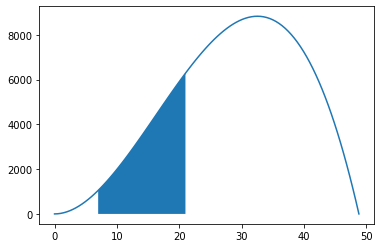

In [205]:
x = np.linspace(0, 48.8281250000000, 100)
y = fun(x)
plt.plot(x,y)

X = np.linspace(7, 21, 100)
Y = fun(X)
plt.fill_between(X,Y)

## Monte Carlo Integration Function

Below is a function for monte carlo integration.  The basic concept is to create a square grid with the closed interval that was selected for the definite integration on the x axis and zero and a value slightly above the maxima on the y axis.

This is not a perfectly universal method because it uses zero as a lower bound which is commonly not the case (there could be negative values) and takes the maxima as an input, when it may not always be as easy to find as it was for us and should be automated in a scalable version (though not too hard).  

In [206]:
import random
# Consider replacing x_low and x_high with 0 and a number that is arbitrarily larger than maxima of the function within the closed interval being integrated over
def m_c_integrate(fun, x_low, x_high, y_low, y_high, iterations = 1000000):
  below = 0
  """
  This function performs numerical integration using monte carlo simulation.
  
  fun: a lambda function with a single x as an input variable, fun(x)
  x_low: the begining of the interval being integrated over
  x_high: the end of the interval being integrated over
  y_low: set at zero for this example
  y_high: a boundary slighly above the maxima of the function within the closed interval
  iterations: number of random points to create
  """
  for i in range(iterations):
    # Select an ordered pair within closed interval (x) and between minima and maxima of function within the closed interval (y)
    x = random.uniform(x_low, x_high)
    y = random.uniform(y_low, y_high)
    
    # Evaluate fun at the selected point and track those which are below the curve
    comp = fun(x)
    if comp > y:
      below = below + 1
    if comp == y:
      below = below + 0.5

  # Find the percentage of points that are below the curve, and the value for that percentage of the total area
  percent_below = below / iterations
  auc = ((x_high - x_low) * (y_high - y_low)) * percent_below
  return auc

## Test Function

Here we simply input our x_low and x_high for the definite integration and the y_low and y_high to finish our overall search space, pass our function (fun), and select our iterations (the higher this number the longer it will take but also the more accurate we expect it to be (if the law of large numbers holds for us).

In [207]:
auc = m_c_integrate(fun, x_low = 7, x_high = 21, y_low = 0, y_high = 9000, iterations = 5000000)
print("The estimated area under the curve of our function between x = 7 and x = 21 is: ", aoc)

The estimated area under the curve of our function between x = 7 and x = 21 is:  49752.4608


## Check Result

Using scipy's integration function, we can check to see how accurate our Monte Carlo integration method is.

In [208]:
integral = quad(fun, 7, 21)
diff = np.abs(integral[0] - auc)
percent = diff / integral[0]
print("The estimated area under the curve of our function between x = 7 and x = 21 is: ", integral[0])
print()
print("The difference between our Monte Carlo method and scipy's integrate.quad function is: ", diff, " or", percent, "percent")

The estimated area under the curve of our function between x = 7 and x = 21 is:  49730.42666666666

The difference between our Monte Carlo method and scipy's integrate.quad function is:  6.158133333337901  or 0.00012383029356684725 percent


## Conclusion

The results of our function are very close to scipy's integrate.quad function.  This is a success in my book!  Hopefully everyone who read this has a better understanding of Monte Carlo methods and enjoyed the notebook.